## Question 4

### (a)

In [81]:
# Reload the dataset to ensure it's correctly loaded
wine_data = pd.read_csv("winequality-red.csv", delimiter=';')

# Check if the dataset was loaded properly
print(wine_data.head())

# Define X as all columns except the last one (features)
X = wine_data.iloc[:, :-1]  # Select all columns except the last (features)
y = wine_data.iloc[:, -1]   # Select the last column (target)

# Check the structure of X and y
print(X.head())  # Should display the first few rows of the feature matrix
print(y.head())  # Should display the first few rows of the target variable


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

### (b)

In [82]:
from sklearn.model_selection import train_test_split


# Drop the last column (target column) by index
X = wine_data.iloc[:, :-1]  # Select all columns except the last one (features)
y = wine_data.iloc[:, -1]   # Select the last column (target, which should be 'quality')

# Split the data into 60% training and 40% temporary (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the temporary 40% into 50% validation and 50% test (each 20% of the total data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


### (c)

In [83]:
import numpy as np

X_intercept = np.c_[np.ones(X.shape[0]), X]

# Step 4: Closed-form solution (Normal Equation) to calculate weights
# w = (X^T * X)^(-1) * X^T * y
w = np.linalg.inv(X_intercept.T @ X_intercept) @ X_intercept.T @ y

# Step 5: Make predictions on the training set
y_train_pred = X_intercept @ w


# Step 7: Compute the Root Mean Squared Error (RMSE)
rmse = np.sqrt(sse / len(y))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Step 8: Print the calculated weights
print("Calculated Weights (w):", w)


Root Mean Squared Error (RMSE): 0.6455750670692045
Calculated Weights (w): [ 2.19652084e+01  2.49905527e-02 -1.08359026e+00 -1.82563948e-01
  1.63312698e-02 -1.87422516e+00  4.36133331e-03 -3.26457970e-03
 -1.78811638e+01 -4.13653144e-01  9.16334413e-01  2.76197699e-01]


### (d)

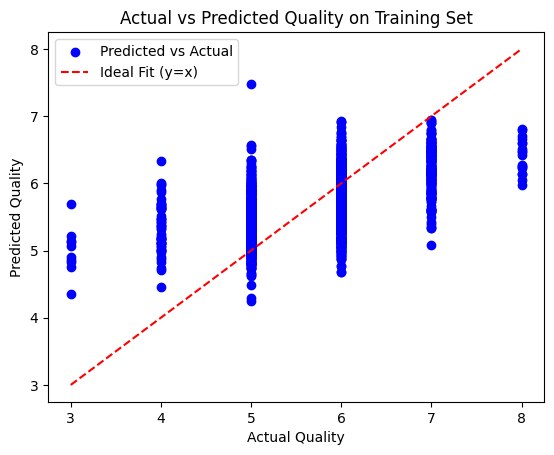

In [84]:
import matplotlib.pyplot as plt

# Step 1: Plot the actual vs predicted values on the training set
plt.scatter(y, y_train_pred, color='blue', label='Predicted vs Actual')

# Step 2: Plot the reference line (y = x) to see how close the predictions are to actual values
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Step 3: Label the axes and add a title
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality on Training Set')

# Add a legend to clarify what the blue points and red line represent
plt.legend()

# Display the plot
plt.show()



### (e)

In [85]:
from sklearn.metrics import mean_squared_error

# Add intercept term to X_test
X_test_intercept = np.c_[np.ones(X_test.shape[0]), X_test]

# Step 1: Make predictions for the test set
y_test_pred = X_test_intercept @ w

# Step 2: Calculate RMSE for training set
rmse_train = np.sqrt(mean_squared_error(y, y_train_pred))
print(f"Training RMSE: {rmse_train}")

# Step 3: Calculate RMSE for test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test RMSE: {rmse_test}")


Training RMSE: 0.6455750670692045
Test RMSE: 0.6738594089102654


### (f)

In [86]:
# Step 6: LMS Algorithm (Least-Mean-Squares) function
def lms(X, y, learning_rate=0.00001, epochs=1000):
    # Initialize weights randomly
    w = np.random.randn(X.shape[1])
    
    # Iterate through epochs
    for epoch in range(epochs):
        # Compute predictions
        y_pred = X @ w  # Matrix multiplication to get predictions
        
        # Compute the gradient
        gradient = -2 * X.T @ (y - y_pred) / len(y)
        
        # Check for NaNs or Infs in gradient
        if np.isnan(gradient).any() or np.isinf(gradient).any():
            print(f"NaN or Inf detected in gradient at epoch {epoch}")
            break
        
        # Update weights
        w -= learning_rate * gradient
        
        # Check for NaNs or Infs in weights
        if np.isnan(w).any() or np.isinf(w).any():
            print(f"NaN or Inf detected in weights at epoch {epoch}")
            break
        
        # Optional: Print weights every 100 epochs for debugging
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Weights: {w}")
    
    return w

# Step 7: Train using LMS
w_lms = lms(X_train_intercept, y_train, learning_rate=0.00001, epochs=1000)


Epoch 0, Weights: [-1.63030215 -0.71848487 -1.31026392 -1.02883925  1.40434621  0.59326229
 -0.50100091 -0.05309806  0.26897017  0.63351986 -1.29978485  0.52477535]
Epoch 100, Weights: [-1.62369124 -0.66058758 -1.30703526 -1.0269755   1.41590498  0.59383092
 -0.37475765  0.14453436  0.2755587   0.65532817 -1.29524811  0.59431858]
Epoch 200, Weights: [-1.62099107 -0.63484696 -1.30587058 -1.0261749   1.41702873  0.59405793
 -0.32650528  0.12160985  0.27824917  0.66417355 -1.29330812  0.62315865]
Epoch 300, Weights: [-1.61875486 -0.61311009 -1.3049272  -1.02548912  1.41704383  0.59424726
 -0.28550627  0.10221042  0.28047735  0.67146466 -1.29167435  0.64684336]
Epoch 400, Weights: [-1.61690424 -0.59470041 -1.30416745 -1.02489846  1.4161408   0.59440528
 -0.25060651  0.08587474  0.28232135  0.67746391 -1.29029511  0.66624231]
Epoch 500, Weights: [-1.61537505 -0.57906391 -1.30356061 -1.02438687  1.41447516  0.59453721
 -0.22086445  0.07211561  0.28384509  0.68238607 -1.28912811  0.68206824]


In [87]:
# Check if any NaN values exist in y_train, y_test, or the predicted values
print(f"NaNs in y_train: {np.isnan(y_train).sum()}")
print(f"NaNs in y_test: {np.isnan(y_test).sum()}")
print(f"NaNs in y_train_pred_lms: {np.isnan(y_train_pred_lms).sum()}")
print(f"NaNs in y_test_pred_lms: {np.isnan(y_test_pred_lms).sum()}")


NaNs in y_train: 0
NaNs in y_test: 0
NaNs in y_train_pred_lms: 0
NaNs in y_test_pred_lms: 0


### (g)

In [88]:

# Step 8: Make predictions on training and test sets using LMS
y_train_pred_lms = X_train_intercept @ w_lms
y_test_pred_lms = X_test_intercept @ w_lms

# Step 11: Calculate RMSE for LMS on the training and test sets
rmse_train_lms = np.sqrt(mean_squared_error(y_train, y_train_pred_lms))
rmse_test_lms = np.sqrt(mean_squared_error(y_test, y_test_pred_lms))

# Print the results
print(f"LMS Training RMSE: {rmse_train_lms}")
print(f"LMS Test RMSE: {rmse_test_lms}")


LMS Training RMSE: 2.4736309135255596
LMS Test RMSE: 2.2992338211927126
